In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
plt.set_loglevel("info")

In [320]:
# Input
# df_file = "results/evaluation_all.tsv"
# out_folder = "results"

df_file = "/home/damiano/Projects/CAFA-evaluator_data/pkg_example/results/evaluation_all.tsv"
out_folder = "/home/damiano/Projects/CAFA-evaluator_data/pkg_example/results"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = None

# Cumulate the last column of the cols variable, e.g. "pr" --> precision, so that the curves are monotonic as in CAFA
cumulate = True

# Methods with coverage below this threshold will not be plotted
coverage_threshold = 0.3

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('wf', ['wrc', 'wpr'])
# metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
# metric, cols =  ('wf_micro', ['wrc_micro', 'wpr_micro'])
# metric, cols = ('s', ['ru', 'mi'])

In [321]:
# Map column short names to full names (for axis labels)
axis_title = {'pr': 'Precision', 'rc': 'Recall', 'f': 'F-score', 'wpr': 'Weighted Precision', 'wrc': 'Weighted Recall', 'wf': 'Weighted F-score', 'mi': 'Misinformation', 'ru': 'Remaining Uncertainty', 's': 'S-score', 'pr_micro': 'Precision (Micro)', 'rc_micro': 'Recall (Micro)', 'f_micro': 'F-score (Micro)', 'wpr_micro': 'Weighted Precision (Micro)', 'wrc_micro': 'Weighted Recall (Micro)', 'wf_micro': 'Weighted F-score (Micro)'}

In [322]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,f,pr_micro,rc_micro,f_micro
0,pred_5.tsv,disorder_function,0.01,168.0,324.0,1190.0,22.0,0.214,0.941,1.000,0.349,0.214,0.936,0.348
1,pred_5.tsv,disorder_function,0.02,168.0,324.0,1190.0,22.0,0.214,0.941,1.000,0.349,0.214,0.936,0.348
2,pred_5.tsv,disorder_function,0.03,168.0,324.0,1189.0,22.0,0.214,0.941,1.000,0.349,0.214,0.936,0.349
3,pred_5.tsv,disorder_function,0.04,168.0,324.0,1189.0,22.0,0.214,0.941,1.000,0.349,0.214,0.936,0.349
4,pred_5.tsv,disorder_function,0.05,168.0,324.0,1189.0,22.0,0.214,0.941,1.000,0.349,0.214,0.936,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,pred_1.tsv,disorder_function,0.41,1.0,0.0,3.0,346.0,0.000,0.000,0.006,0.000,0.000,0.000,0.000
348,pred_1.tsv,disorder_function,0.42,1.0,0.0,3.0,346.0,0.000,0.000,0.006,0.000,0.000,0.000,0.000
349,pred_1.tsv,disorder_function,0.43,1.0,0.0,3.0,346.0,0.000,0.000,0.006,0.000,0.000,0.000,0.000
350,pred_1.tsv,disorder_function,0.44,1.0,0.0,3.0,346.0,0.000,0.000,0.006,0.000,0.000,0.000,0.000


In [323]:
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # Set method information (optional)
    methods = pd.read_csv(names_file, delim_whitespace=True, header=0)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
    print(methods)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

n     tp      fp     fn  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01  168.0  324.0  1190.0   22.0   
                                        0.02  168.0  324.0  1190.0   22.0   
                                        0.03  168.0  324.0  1189.0   22.0   
                                        0.04  168.0  324.0  1189.0   22.0   
                                        0.05  168.0  324.0  1189.0   22.0   
...                                             ...    ...     ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.41    1.0    0.0     3.0  346.0   
                                        0.42    1.0    0.0     3.0  346.0   
                                        0.43    1.0    0.0     3.0  346.0   
                                        0.44    1.0    0.0     3.0  346.0   
                                        0.45    1.0    0.0     2.0  346.0   

                                                 pr     rc    cov      f  \
group      label      ns                tau                                
pred_5.tsv pred_5.tsv disorder_function 0.01  0.214  0.941  1.000  0.349   
                                        0.02  0.214  0.941  1.000  0.349   
                                        0.03  0.214  0.941  1.000  0.349   
                                        0.04  0.214  0.941  1.000  0.349   
                                        0.05  0.214  0.941  1.000  0.349   
...                                             ...    ...    ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.41  0.000  0.000  0.006  0.000   
                                        0.42  0.000  0.000  0.006  0.000   
                                        0.43  0.000  0.000  0.006  0.000   
                                        0.44  0.000  0.000  0.006  0.000   
                                        0.45  0.000  0.000  0.006  0.000   

                                              pr_micro  rc_micro  f_micro  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01     0.214     0.936    0.348   
                                        0.02     0.214     0.936    0.348   
                                        0.03     0.214     0.936    0.349   
                                        0.04     0.214     0.936    0.349   
                                        0.05     0.214     0.936    0.349   
...                                                ...       ...      ...   
pred_1.tsv pred_1.tsv disorder_function 0.41     0.000     0.000    0.000   
                                        0.42     0.000     0.000    0.000   
                                        0.43     0.000     0.000    0.000   
                                        0.44     0.000     0.000    0.000   
                                        0.45     0.000     0.000    0.000   

                                              is_baseline  
group      label      ns                tau                
pred_5.tsv pred_5.tsv disorder_function 0.01        False  
                                        0.02        False  
                                        0.03        False  
                                        0.04        False  
                                        0.05        False  
...                                                   ...  
pred_1.tsv pred_1.tsv disorder_function 0.41        False  
                                        0.42        False  
                                        0.43        False  
                                        0.44        False  
                                        0.45        False  

[352 rows x 12 columns]

In [324]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

n     tp      fp     fn  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01  168.0  324.0  1190.0   22.0   
                                        0.02  168.0  324.0  1190.0   22.0   
                                        0.03  168.0  324.0  1189.0   22.0   
                                        0.04  168.0  324.0  1189.0   22.0   
                                        0.05  168.0  324.0  1189.0   22.0   
...                                             ...    ...     ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.41    1.0    0.0     3.0  346.0   
                                        0.42    1.0    0.0     3.0  346.0   
                                        0.43    1.0    0.0     3.0  346.0   
                                        0.44    1.0    0.0     3.0  346.0   
                                        0.45    1.0    0.0     2.0  346.0   

                                                 pr     rc    cov      f  \
group      label      ns                tau                                
pred_5.tsv pred_5.tsv disorder_function 0.01  0.214  0.941  1.000  0.349   
                                        0.02  0.214  0.941  1.000  0.349   
                                        0.03  0.214  0.941  1.000  0.349   
                                        0.04  0.214  0.941  1.000  0.349   
                                        0.05  0.214  0.941  1.000  0.349   
...                                             ...    ...    ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.41  0.000  0.000  0.006  0.000   
                                        0.42  0.000  0.000  0.006  0.000   
                                        0.43  0.000  0.000  0.006  0.000   
                                        0.44  0.000  0.000  0.006  0.000   
                                        0.45  0.000  0.000  0.006  0.000   

                                              pr_micro  rc_micro  f_micro  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01     0.214     0.936    0.348   
                                        0.02     0.214     0.936    0.348   
                                        0.03     0.214     0.936    0.349   
                                        0.04     0.214     0.936    0.349   
                                        0.05     0.214     0.936    0.349   
...                                                ...       ...      ...   
pred_1.tsv pred_1.tsv disorder_function 0.41     0.000     0.000    0.000   
                                        0.42     0.000     0.000    0.000   
                                        0.43     0.000     0.000    0.000   
                                        0.44     0.000     0.000    0.000   
                                        0.45     0.000     0.000    0.000   

                                              is_baseline  \
group      label      ns                tau                 
pred_5.tsv pred_5.tsv disorder_function 0.01        False   
                                        0.02        False   
                                        0.03        False   
                                        0.04        False   
                                        0.05        False   
...                                                   ...   
pred_1.tsv pred_1.tsv disorder_function 0.41        False   
                                        0.42        False   
                                        0.43        False   
                                        0.44        False   
                                        0.45        False   

                                                                                         colors  
group      label      ns                tau                                                      
pred_5.tsv pred_5.tsv disorder_function 0.01  (0.12156862745098039,

In [325]:
# Filter by coverage
df = df[df['cov'] >= coverage_threshold]
df

n     tp      fp     fn  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01  168.0  324.0  1190.0   22.0   
                                        0.02  168.0  324.0  1190.0   22.0   
                                        0.03  168.0  324.0  1189.0   22.0   
                                        0.04  168.0  324.0  1189.0   22.0   
                                        0.05  168.0  324.0  1189.0   22.0   
...                                             ...    ...     ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.03  167.0  128.0   498.0  218.0   
                                        0.04  166.0  127.0   352.0  219.0   
                                        0.05  155.0  122.0   327.0  224.0   
                                        0.06  102.0   74.0    50.0  272.0   
                                        0.07  102.0   74.0    50.0  272.0   

                                                 pr     rc    cov      f  \
group      label      ns                tau                                
pred_5.tsv pred_5.tsv disorder_function 0.01  0.214  0.941  1.000  0.349   
                                        0.02  0.214  0.941  1.000  0.349   
                                        0.03  0.214  0.941  1.000  0.349   
                                        0.04  0.214  0.941  1.000  0.349   
                                        0.05  0.214  0.941  1.000  0.349   
...                                             ...    ...    ...    ...   
pred_1.tsv pred_1.tsv disorder_function 0.03  0.218  0.384  0.994  0.278   
                                        0.04  0.276  0.381  0.988  0.320   
                                        0.05  0.283  0.369  0.923  0.320   
                                        0.06  0.672  0.227  0.607  0.339   
                                        0.07  0.672  0.227  0.607  0.339   

                                              pr_micro  rc_micro  f_micro  \
group      label      ns                tau                                 
pred_5.tsv pred_5.tsv disorder_function 0.01     0.214     0.936    0.348   
                                        0.02     0.214     0.936    0.348   
                                        0.03     0.214     0.936    0.349   
                                        0.04     0.214     0.936    0.349   
                                        0.05     0.214     0.936    0.349   
...                                                ...       ...      ...   
pred_1.tsv pred_1.tsv disorder_function 0.03     0.204     0.370    0.263   
                                        0.04     0.265     0.367    0.308   
                                        0.05     0.272     0.353    0.307   
                                        0.06     0.597     0.214    0.315   
                                        0.07     0.597     0.214    0.315   

                                              is_baseline  \
group      label      ns                tau                 
pred_5.tsv pred_5.tsv disorder_function 0.01        False   
                                        0.02        False   
                                        0.03        False   
                                        0.04        False   
                                        0.05        False   
...                                                   ...   
pred_1.tsv pred_1.tsv disorder_function 0.03        False   
                                        0.04        False   
                                        0.05        False   
                                        0.06        False   
                                        0.07        False   

                                                                                         colors  
group      label      ns                tau                                                      
pred_5.tsv pred_5.tsv disorder_function 0.01  (0.12156862745098039,

In [326]:
# Identify the best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'wf', 'f_micro', 'wf_micro'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group       ns               
pred_1.tsv  disorder_function    (pred_1.tsv, pred_1.tsv, disorder_function, 0.06)
pred_2.tsv  disorder_function    (pred_2.tsv, pred_2.tsv, disorder_function, 0.84)
pred_3.tsv  disorder_function    (pred_3.tsv, pred_3.tsv, disorder_function, 0.89)
pred_4.tsv  disorder_function    (pred_4.tsv, pred_4.tsv, disorder_function, 0.06)
pred_5.tsv  disorder_function    (pred_5.tsv, pred_5.tsv, disorder_function, 0.38)
Name: f, dtype: object

In [327]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

,,,,cov,colors,rc,pr,f
group,label,ns,tau,,,,,
pred_1.tsv,pred_1.tsv,disorder_function,0.06,0.607,"(0.17254901960784313, 0.6274509803921569, 0.17...",0.227,0.672,0.339
pred_2.tsv,pred_2.tsv,disorder_function,0.84,0.970,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.387,0.306,0.342
pred_3.tsv,pred_3.tsv,disorder_function,0.89,1.000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.557,0.492,0.523
pred_4.tsv,pred_4.tsv,disorder_function,0.06,1.000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.665,0.667,0.666
pred_5.tsv,pred_5.tsv,disorder_function,0.38,0.982,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.671,0.456,0.543


In [328]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()

# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if cumulate:
    if metric in ['f', 'wf', 'f_micro', 'wf_micro']:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
    else:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()


# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau    cov  \
group      label      ns                               
pred_1.tsv pred_1.tsv disorder_function  0.01  1.000   
                      disorder_function  0.02  1.000   
                      disorder_function  0.03  0.994   
                      disorder_function  0.04  0.988   
                      disorder_function  0.05  0.923   
...                                       ...    ...   
pred_5.tsv pred_5.tsv disorder_function  0.43  0.720   
                      disorder_function  0.44  0.643   
                      disorder_function  0.45  0.583   
                      disorder_function  0.46  0.488   
                      disorder_function  0.47  0.351   

                                                                                    colors  \
group      label      ns                                                                     
pred_1.tsv pred_1.tsv disorder_function  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      disorder_function  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      disorder_function  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      disorder_function  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      disorder_function  (0.17254901960784313, 0.6274509803921569, 0.17...   
...                                                                                    ...   
pred_5.tsv pred_5.tsv disorder_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                      disorder_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                      disorder_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                      disorder_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                      disorder_function  (0.12156862745098039, 0.4666666666666667, 0.70...   

                                            rc     pr      f  
group      label      ns                                      
pred_1.tsv pred_1.tsv disorder_function  0.393  0.195  0.261  
                      disorder_function  0.393  0.203  0.268  
                      disorder_function  0.384  0.218  0.278  
                      disorder_function  0.381  0.276  0.320  
                      disorder_function  0.369  0.283  0.320  
...                                        ...    ...    ...  
pred_5.tsv pred_5.tsv disorder_function  0.359  0.557  0.437  
                      disorder_function  0.300  0.561  0.391  
                      disorder_function  0.268  0.585  0.368  
                      disorder_function  0.219  0.594  0.320  
                      disorder_function  0.166  0.672  0.266  

[259 rows x 6 columns]

In [329]:
# Calculate precision-recall AUC
for _, df_g in df_methods.groupby(level=['group', 'label', 'ns']):
    print(df_g[['tau', 'rc', 'pr']])   
    print(df_g['rc'].diff(-1).shift(1))
    print(df_g['pr'])
    print((df_g['rc'].diff(-1).shift(1) * df_g['pr']))
    break

                                          tau     rc     pr
group      label      ns                                   
pred_1.tsv pred_1.tsv disorder_function  0.01  0.393  0.195
                      disorder_function  0.02  0.393  0.203
                      disorder_function  0.03  0.384  0.218
                      disorder_function  0.04  0.381  0.276
                      disorder_function  0.05  0.369  0.283
                      disorder_function  0.06  0.227  0.672
                      disorder_function  0.07  0.227  0.672
group       label       ns               
pred_1.tsv  pred_1.tsv  disorder_function      NaN
                        disorder_function    0.000
                        disorder_function    0.009
                        disorder_function    0.003
                        disorder_function    0.012
                        disorder_function    0.142
                        disorder_function    0.000
Name: rc, dtype: float64
group       label       ns          

In [330]:
# Calculate average precision score 
if metric in ['f', 'wf', 'f_micro', 'wf_micro']:
    df_best['aps'] = df_methods.groupby(level=['group', 'label', 'ns'])[[cols[0], cols[1]]].apply(lambda x: (x[cols[0]].diff(-1).shift(1) * x[cols[1]]).sum())

In [331]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov
group,label,ns,tau,,,,,,,
pred_1.tsv,pred_1.tsv,disorder_function,0.06,0.607,"(0.17254901960784313, 0.6274509803921569, 0.17...",0.227,0.672,0.339,0.101610,1.0
pred_2.tsv,pred_2.tsv,disorder_function,0.84,0.970,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.387,0.306,0.342,0.220724,1.0
pred_3.tsv,pred_3.tsv,disorder_function,0.89,1.000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.557,0.492,0.523,0.261173,1.0
pred_4.tsv,pred_4.tsv,disorder_function,0.06,1.000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.665,0.667,0.666,0.174482,1.0
pred_5.tsv,pred_5.tsv,disorder_function,0.38,0.982,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.671,0.456,0.543,0.375517,1.0


In [332]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
if 'aps' not in df_best.columns:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
else:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} APS={x['aps']:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov,label
group,label,ns,tau,,,,,,,,
pred_1.tsv,pred_1.tsv,disorder_function,0.06,0.607,"(0.17254901960784313, 0.6274509803921569, 0.17...",0.227,0.672,0.339,0.101610,1.0,pred_1.tsv (F=0.339 APS=0.102 C=1.000)
pred_2.tsv,pred_2.tsv,disorder_function,0.84,0.970,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.387,0.306,0.342,0.220724,1.0,pred_2.tsv (F=0.342 APS=0.221 C=1.000)
pred_3.tsv,pred_3.tsv,disorder_function,0.89,1.000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.557,0.492,0.523,0.261173,1.0,pred_3.tsv (F=0.523 APS=0.261 C=1.000)
pred_4.tsv,pred_4.tsv,disorder_function,0.06,1.000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.665,0.667,0.666,0.174482,1.0,pred_4.tsv (F=0.666 APS=0.174 C=1.000)
pred_5.tsv,pred_5.tsv,disorder_function,0.38,0.982,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.671,0.456,0.543,0.375517,1.0,pred_5.tsv (F=0.543 APS=0.376 C=1.000)


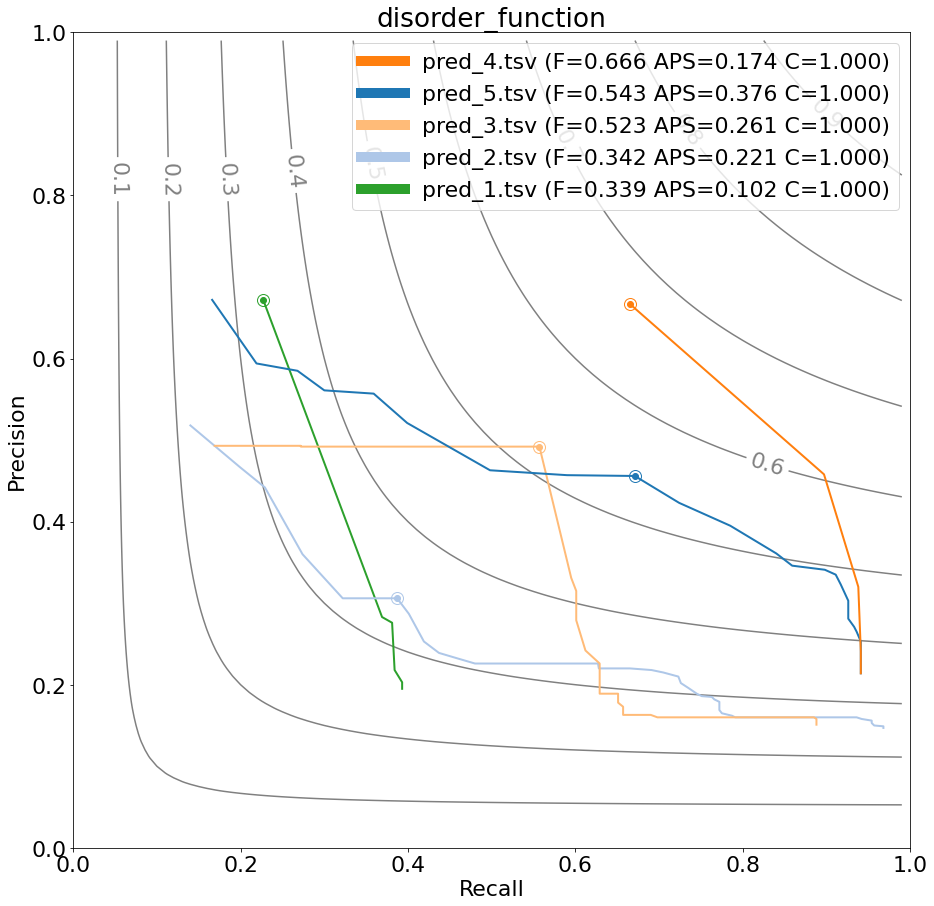

In [333]:
plt.rcParams.update({'font.size': 22})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines. At the moment they are provided only for the F-score
    if metric in ['f', 'wf', 'f_micro', 'wf_micro']:
        CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
        ax.clabel(CS, inline=True) #, fontsize=10)

    # Iterate methods
    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric in ['f', 'wf', 'f_micro', 'wf_micro'] else True, False]).iterrows()):
        data = df_methods.loc[index[:-1]]
        
        # Precision-recall or mi-ru curves
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        
        # F-max or S-min dots
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    # Set axes limit
    if metric in ['f', 'wf', 'f_micro', 'wf_micro']:
        plt.xlim(0, 1)
        plt.ylim(0, 1)
   
    # plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    # plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    # Set titles
    ax.set_title(ns)
    ax.set_xlabel(axis_title[cols[0]])
    ax.set_ylabel(axis_title[cols[1]])
    
    # Legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg = ax.legend(markerscale=6)
    for legobj in leg.get_lines():
        legobj.set_linewidth(10.0)

    # Save figure on disk
    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight')
    # plt.clf()